In [14]:
import numpy as np
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:

PARENT_PATH = os.path.dirname(os.getcwd())
LOG_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Logs','logs.txt')


[300.0, 300.0, 300.0, 300.0, 301.0, 301.0, 301.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 301.0, 301.0, 301.0, 301.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0]
[9.0, 9.0, 40.0, 9.0, 8.0, 39.0, 8.0, 8.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 8.0, 8.0, 39.0, 8.0, 8.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 8.0, 39.0, 8.0, 8.0, 39.0, 8.0, 8.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0, 9.0, 40.0, 9.0]
Average sleep time: 300.21311475409834
Average active time: 18.901639344262296


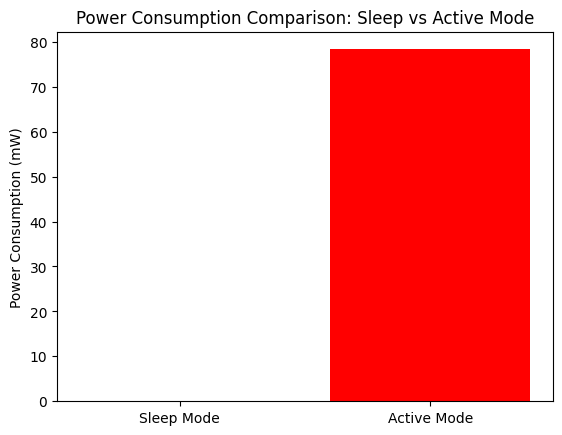

Total Energy Savings: 0.000025 kWh
Estimated Carbon Reduction: 0.000010 kg CO₂
Total Energy if Always Active: 1524.577120 Joules
Actual Energy Used: 90.794664 Joules
Energy Savings: 94.04%
Energy Savings per Year: 41.866481 kWh
Carbon Emissions Reduction per Year: 17.583922 kg CO₂


In [21]:
file_content:None
with open(LOG_PATH, 'r') as file:
    file_content = file.read()

file_content = file_content
# [INFO] - [WIFI CONNECTION (0)] Connecting to WIFI
# Extracting the time and the topic

pattern = r"\[(.*?)\] \[INFO\] - \[(SLEEP|WAKEUP).*?\]"

# Find all matches
matches = re.findall(pattern, file_content )

# Separate wake-up and sleep times
sleep_times = []
wake_times = []

sleep_durations = []
active_durations = []

for i in range(len(matches)):
    if i == len(matches)-1:
        break
    if matches[i][1] == "SLEEP" and matches[i+1][1] == "WAKEUP":
        time_difference = datetime.strptime(matches[i+1][0], "%Y-%m-%d %H:%M:%S") - datetime.strptime(matches[i][0], "%Y-%m-%d %H:%M:%S")
        sleep_durations.append(time_difference.total_seconds())
    elif matches[i][1] == "WAKEUP" and matches[i+1][1] == "SLEEP":
        time_difference = datetime.strptime(matches[i+1][0], "%Y-%m-%d %H:%M:%S") - datetime.strptime(matches[i][0], "%Y-%m-%d %H:%M:%S")
        active_durations.append(time_difference.total_seconds())


sleep_durations = [x for x in sleep_durations if x > 0]   
print(sleep_durations)
print(active_durations)
print(f"Average sleep time: {np.mean(sleep_durations)}")
print(f"Average active time: {np.mean(active_durations)}")


sleep_power = 26.85 * 1e-3  # Convert to mW
active_power = 78.32  # mW

# Bar plot comparing power consumption
plt.bar(['Sleep Mode', 'Active Mode'], [sleep_power, active_power], color=['green', 'red'])
plt.ylabel('Power Consumption (mW)')
plt.title('Power Consumption Comparison: Sleep vs Active Mode')
plt.show()

# Constants
sleep_power = 26.85 * 1e-6  # Convert to W (watts)
active_power = 78.32 * 1e-3  # Convert to W (watts)

# Total energy consumption in Joules (Energy = Power * Time)
sleep_energy = np.sum(sleep_durations) * sleep_power  # Joules (Watt-seconds)
active_energy = np.sum(active_durations) * active_power  # Joules

# Energy savings by using sleep mode
energy_savings = active_energy - sleep_energy

# Convert energy savings to kilowatt-hours (kWh)
energy_savings_kwh = energy_savings / (3600 * 1e3)

# Average carbon footprint per kWh (in kg of CO2)
carbon_per_kwh = 0.42  # This can vary, using a rough global estimate

# Carbon footprint savings
carbon_savings = energy_savings_kwh * carbon_per_kwh

print(f"Total Energy Savings: {energy_savings_kwh:.6f} kWh")
print(f"Estimated Carbon Reduction: {carbon_savings:.6f} kg CO₂")

# Power consumption in watts
sleep_power = 26.85 * 1e-6  # Convert to watts (W)
active_power = 78.32 * 1e-3  # Convert to watts (W)

# Total time (sum of sleep and active durations) in seconds
total_time = np.sum(sleep_durations) + np.sum(active_durations)
print(f"Total Time: {total_time/3600:.2f} hours")

# Energy used if the device was active the whole time (in joules)
total_energy_no_sleep = total_time * active_power  # Energy = Power * Time (W * s)

# Actual energy used with sleep and active modes (in joules)
actual_energy = (np.sum(sleep_durations) * sleep_power) + (np.sum(active_durations) * active_power)

# Energy savings percentage
energy_savings_percentage = ((total_energy_no_sleep - actual_energy) / total_energy_no_sleep) * 100

# Print the total and actual energy and savings percentage
print(f"Total Energy if Always Active: {total_energy_no_sleep:.6f} Joules")
print(f"Actual Energy Used: {actual_energy:.6f} Joules")
print(f"Energy Savings: {energy_savings_percentage:.2f}%")


# Assuming the device runs on a daily cycle (number of sleep-wake cycles per day)
cycles_per_day = 24*12  # Example: 24 cycles per day (one per hour)

# Energy savings per cycle (in joules) - already calculated in the previous step
energy_savings_per_cycle = total_energy_no_sleep - actual_energy  # Joules

# Convert joules to kilowatt-hours (1 joule = 2.77778e-7 kWh)
energy_savings_per_cycle_kwh = energy_savings_per_cycle * 2.77778e-7

# Total energy savings per year
energy_savings_per_year_kwh = energy_savings_per_cycle_kwh * cycles_per_day * 365

# Carbon emissions reduction (0.42 kg CO₂ per kWh)
carbon_reduction_per_year = energy_savings_per_year_kwh * 0.42

# Print results
print(f"Energy Savings per Year: {energy_savings_per_year_kwh:.6f} kWh")
print(f"Carbon Emissions Reduction per Year: {carbon_reduction_per_year:.6f} kg CO₂")


# sleep_energy = np.sum(sleep_durations) * sleep_power  # Energy = Power * Time (time in seconds, power in mW)
# active_energy = np.sum(active_durations) * active_power

# # Pie chart to show the energy consumption distribution
# labels = ['Sleep Mode', 'Active Mode']
# sizes = [sleep_energy, active_energy]
# colors = ['green', 'red']

# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# plt.title('Energy Consumption Distribution: Sleep vs Active Mode')
# plt.show()
# for match in matches:
#     timestamp_str, event_type = match
#     timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
    
#     if event_type == "SLEEP":
#         sleep_times.append(timestamp)
#     elif event_type == "WAKEUP":
#         wake_times.append(timestamp)

# # Calculate the difference between sleep and wake-up times
# sleep_durations = []
# for sleep, wake in zip(sleep_times, wake_times):
#     sleep_duration = (wake - sleep).total_seconds() / 60  # Convert to minutes
#     sleep_durations.append(sleep_duration)

 
# print(sleep_durations)